# Cognitive Algorithms - Assignment 4 (30 points)
Cognitive Algorithms        
Summer term 2018      
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 

**Due on June 20, 2018 10am via ISIS **
                    
After completing all tasks, run the whole notebook so that the content of each cell is properly displayed. Make sure that the code was ran and the entire output (e.g. figures) is printed. Print the notebook as a PDF file and again make sure that all lines are readable - use line breaks in the Python Code '\' if necessary. Points will be deducted, if code or content is not readable!                  
           
**Upload the PDF file that contains a copy of your notebook on ISIS.** 

Group: Group08       
Members: 
- Chen, Yang
- Liu, Huiran
- Smejkal, Karel
- Tian, Qihang
- Arat, Emrecan       

# Part 1: Theory (8 points)
---
Let $\varphi$ be a function, that maps the input data $x_1, \ldots, x_n \in \mathbb{R}^d$ to some finite or infinite dimensional $\mathbb{R}$-vector space (so-called *feature space*). The *representer theorem* states that if a function $k: \mathbb{R}^d \times \mathbb{R}^d \to \mathbb R$ is a *valid kernel*, then it defines the scalar product of the input data in that feature space
$$ k(x, x') \; = \; \langle \varphi(x), \varphi(x') \rangle \; \; \; \; \; \text{for all} \; \;  x, x' \in \mathbb{R}^d$$
The function $k$ is a *valid kernel*, iff it satisfies the *Mercer's condition*, which verifies that for any input data $x_1, \ldots, x_n \in \mathbb{R}^d$ and coefficients $c_1, \ldots, c_n \in \mathbb{R}$ the inequality 
$$ \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k(x_i, x_j) \geq 0 $$
is satisfied.

**A) (4 points)** Show that the sum of two valid kernels $k_1$ and $k_2$ is again a valid kernel, i.e. that 
$$k(x,x') := k_1(x, x') + k_2(x,x')$$
satisfies the Mercer's condition.

**Derivation for A)**
$$\begin{align}
\sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k(x_i, x_j) &=\sum_{i=1}^{n} \sum_{j=1}^n c_i c_j (k_1(x_i, x_j)+k_2(x_i, x_j))\\
                                                &=\sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k_1(x_i, x_j)+\sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k_2(x_i, x_j)
\end{align}$$

since k1 and k2 is a valid kernel
$$\sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k_1(x_i, x_j)\geq 0 \quad \quad \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k_2(x_i, x_j)\geq 0$$

hence $$\sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k(x_i, x_j)\geq 0$$
then $$k(x,x') := k_1(x, x') + k_2(x,x')$$
satisfies the Mercer's condition.

**B) (4 point)** Let $\varphi_1: \mathbb{R}^d \to \mathbb{R}^{h_1}$ and $\varphi_2: \mathbb{R}^d \to \mathbb{R}^{h_2}$ the feature mappings of $k_1$ and $k_2$. Give the feature mapping for the kernel $k$, i.e. a mapping $\varphi$ such that 
$$k(x, x') \; = \; k_1(x, x') + k_2(x,x') \; = \; \langle \varphi(x), \varphi(x') \rangle$$
and show that it fulfills the representer theorem.

**Derivation for B**
$$\begin{align}
k_1(x, x')+ k_2(x,x')  &= \langle \varphi_1(x),\varphi_1(x') \rangle+\langle \varphi_2(x), \varphi_2(x') \rangle \\
                       &=\underbrace{\varphi_1(x)^\top \varphi_1(x')}_{1\times h_1 \quad h_1\times1} +\underbrace{\varphi_2(x)^\top \varphi_2(x')}_{1\times h_2 \quad h_2\times1}
                       &\to \mathbb R
\end{align}$$


so Let $\varphi$ be a function, that maps the input data $x_1, \ldots, x_n \in \mathbb{R}^d$ to some finite or infinite dimensional $\mathbb{R}$-vector space 


then


$$\begin{align}
k(x, x')&=\langle \varphi(x),\varphi(x') \rangle \\
        &=\langle \varphi_1(x),\varphi_1(x') \rangle+\langle \varphi_2(x), \varphi_2(x') \rangle\\
        &=k_1(x, x')+ k_2(x,x') \to \mathbb R
\end{align}$$

# Part 2: Programming (22 points)
---

The application in this assignment is the same as in assignment 4. You will predict two dimensional hand positions $y \in \mathbb{R}^2$ from electromyographic (EMG) recordings $x \in \mathbb{R}^{192}$ obtained with high-density electrode arrays on the lower arm.     
Labels are 2D positions of the hand during different hand movements.

Remember that even after 'linearizing' the EMG-hand position relationship by computing the log of the EMG features, the relationship is not exactly linear. Also we do not know the exact non-linearity; it might not be the same for all regions in EMG space and for all electrodes. So we can hope to gain something from using a non-parametric and non-linear method like kernel ridge regression.

The criterion to evaluate the model and select optimal parameters is the so called coefficient of determination, or $r^2$ index
$$ r^2 = 1-\frac{\sum_{d=1}^D \mathbb{V}(\hat{y}_d-y_d)}{\sum_{d=1}^D \mathbb{V}(y_d)} $$
where $D$ is the dimensionality of the data labels, $y$ are the true labels and $\hat{y}$ the estimated labels. This score is 1 for perfect predictions and smaller otherwise.

Use the data set ```myo_data.mat``` from the last assignment. 

In [1]:
import pylab as pl
import scipy as sp
from numpy.linalg import inv
from numpy.linalg import solve
from scipy.io import loadmat
import numpy as np
from scipy.spatial.distance import cdist
%matplotlib inline

In [24]:
def load_data(fname):
    ''' Loads EMG data from <fname> '''
    # load the data
    data = loadmat(fname)
    # extract data for training
    X_train = data['training_data']
    X_train = sp.log(X_train)
    X_train = X_train[:, :1000]
    # extract hand positions
    Y_train = data['training_labels']
    Y_train = Y_train[:, :1000]
    return X_train,Y_train

def GaussianKernel(X1, X2, kwidth):
    ''' Compute Gaussian Kernel 
    Input: X1    - DxN1 array of N1 data points with D features 
           X2    - DxN2 array of N2 data points with D features 
           kwidth - Kernel width
    Output K     - N1 x N2 Kernel matrix
    '''
    assert(X1.shape[0] == X2.shape[0])
    K = cdist(X1.T, X2.T, 'euclidean')
    K = np.exp(-(K ** 2) / (2. * kwidth ** 2))
    return K

def train_krr(X_train, Y_train,kwidth,llambda):
    ''' Trains kernel ridge regression (krr)
    Input:       X_train  -  DxN array of N data points with D features
                 Y        -  D2xN array of length N with D2 multiple labels
                 kwdith   -  kernel width
                 llambda    -  regularization parameter
    Output:      alphas   -  NxD2 array, weighting of training data used for apply_krr                     
    '''
    # your code here
    K=GaussianKernel(X_train, X_train,kwidth)
    alphas=np.dot(inv(K+llambda*np.identity(X_train.shape[1])),Y_train.T)
    
    return alphas
    
def apply_krr(alphas, X_train, X_test, kwidth):
    ''' Applys kernel ridge regression (krr)
    Input:      alphas      -  NtrxD2 array trained in train_krr      
                X_train     -  DxNtr array of Ntr train data points with D features
                X_test      -  DxNte array of Nte test data points with D features
                kwidht      -  Kernel width             
    Output:     Y_test      -  D2xNte array
    '''
    # your code here
    K=GaussianKernel(X_test,X_train,kwidth)
    Y_test=(np.dot(K,alphas)).T
    
    return Y_test

def train_ols(X_train, Y_train):
    ''' Trains ordinary least squares (ols) regression 
    Input:       X_train  -  DxN array of N data points with D features
                 Y        -  D2xN array of length N with D2 multiple labels
    Output:      W        -  DxD2 array, linear mapping used to estimate labels 
                             with sp.dot(W.T, X)                      
    '''
    #W = sp.dot(inv(sp.dot(X_train,X_train.T)),sp.dot(X_train,Y_train.T))
    W = solve(sp.dot(X_train,X_train.T),sp.dot(X_train,Y_train.T))
    return W
    
def apply_ols(W, X_test):
    ''' Applys ordinary least squares (ols) regression 
    Input:       X_test    -  DxN array of N data points with D features
                 W        -  DxD2 array, linear mapping used to estimate labels 
                             trained with train_ols                   
    Output:     Y_test    -  D2xN array
    '''
    Y_test = sp.dot(W.T, X_test)
    return Y_test

def test_handpositions():
    X,Y = load_data('myo_data.mat')
    crossvalidate_krr(X,Y)

def test_sine_toydata(kwidth = 1, llambda = 1):
    #Data generation
    X_train = sp.arange(0,10,.01)
    X_train = X_train[None,:]
    Y_train = sp.sin(X_train) + sp.random.normal(0,.5,X_train.shape)
    #Linear Regression 
    w_est = train_ols(X_train, Y_train) 
    Y_est_lin = apply_ols(w_est,X_train)
    #Kernel Ridge Regression
    alphas = train_krr(X_train,Y_train,kwidth,llambda)
    Y_est_krr = apply_krr(alphas,X_train,X_train,kwidth)
    
    #Plot result
    pl.figure()
    pl.plot(X_train.T, Y_train.T, '+k', label = 'Train Data')
    pl.plot(X_train.T, Y_est_lin.T, '-.', linewidth = 2, label = 'OLS')
    pl.plot(X_train.T, Y_est_krr.T,  'r', linewidth = 2, label = 'KRR')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.title(r'$\lambda$ = ' + str(llambda) + '   $\sigma$ = ' + str(kwidth))
    pl.legend(loc = 'lower right')
    
      
def crossvalidate_krr(X,Y,f=5, kwidths=10.0**np.array([0, 1, 2]), llambdas=10.0**np.array([-4, -2, 0])):
    ''' 
    Test generalization performance of kernel ridge regression with gaussian kernel
    Input:      X   data (dims-by-samples)
                Y   labels (dims2-by-samples)
                f   number of cross-validation folds
                kwidths width of gaussian kernel function 
                llambdas regularizer (height of ridge on kernel matrix)
    '''
    N = f*(X.shape[-1]//f)
    idx = sp.reshape(sp.random.permutation(sp.arange(N)),(f,N//f))
    r2_outer = sp.zeros((f))
    r2_linear = sp.zeros((f))
    r2_inner = sp.zeros((f-1,kwidths.shape[-1],llambdas.shape[-1]))
    
    # to outer cross-validation (model evaluation)
    for ofold in range(f):
        # split in training and test (outer fold)
        otestidx = sp.zeros((f),dtype=bool)
        otestidx[ofold] = 1
        otest = idx[otestidx,:].flatten()
        otrain = idx[~otestidx,:]
        
        # inner cross-validation (model selection)
        for ifold in range(f-1):
            # split in training and test (inner fold)
            itestidx = sp.zeros((f-1),dtype=bool)
            itestidx[ifold] = 1
            itest = otrain[itestidx,:].flatten()
            itrain = otrain[~itestidx,:].flatten()
            
            # do inner cross-validation (model selection)
            for illambda in range(llambdas.shape[-1]):
                for ikwidth in range(kwidths.shape[-1]):
                    #compute kernel for all data points
                    alphas = train_krr(X[:,itrain],Y[:,itrain],kwidths[ikwidth],llambdas[illambda])
                    yhat = apply_krr(alphas, X[:,itrain], X[:,itest],kwidths[ikwidth])
                    r2_inner[ifold,ikwidth,illambda] = compute_rsquare(yhat,Y[:,itest])

        #train again using optimal parameters
        r2_across_folds = r2_inner.mean(axis=0)
        optkwidthidx, optllambdaidx = np.unravel_index(r2_across_folds.flatten().argmax(),r2_across_folds.shape)
        #evaluate model on outer test fold
        alphas = train_krr(X[:,otrain.flatten()],Y[:,otrain.flatten()], kwidths[optkwidthidx],llambdas[optllambdaidx])
        yhat = apply_krr(alphas, X[:,otrain.flatten()],X[:,otest], kwidths[optkwidthidx])
        r2_outer[ofold] = compute_rsquare(yhat,Y[:,otest])

        # for comparison: predict with linear model
        w_est = train_ols(X[:,otrain.flatten()], Y[:,otrain.flatten()]) 
        y_est_lin = apply_ols(w_est,X[:,otest])
        r2_linear[ofold] = compute_rsquare(y_est_lin,Y[:,otest])
        
        print ('Fold %d'%ofold + ' best kernel width %f'%kwidths[optkwidthidx] +\
        ' best regularizer %f'%llambdas[optllambdaidx] + \
        ' rsquare %f'%r2_outer[ofold] + \
        ' rsquare linear %f'%r2_linear[ofold])
    pl.figure()
    pl.boxplot(sp.vstack((r2_outer,r2_linear)).T)
    pl.ylabel('$r^2$')
    pl.xticks((1,2),('KRR','Lin'))
    #pl.savefig('krr_vs_lin_comparison.pdf')
    return r2_outer,r2_linear
    
def compute_rsquare(yhat,Y):
    '''compute coefficient of determination'''
    return 1 - (sp.var((yhat - Y),axis=1).sum()/sp.var(Y,axis=1).sum())

**A) (6 points)** Implement Kernel Ridge Regression (KRR) by completing the function stubs  ```krr_train``` and  ```krr_apply```. 
We use the notation from assignment 4, 
$$ X_{\text{train}} \in \mathbb{R}^{D_X \times N_{tr}}, \;  Y_{\text{train}} \in \mathbb{R}^{D_Y \times N_{tr}}, \; X_{\text{test}} \in \mathbb{R}^{D_X \times N_{te}} $$
In ```krr_train```, you estimate a linear combination of the input vectors $\alpha$, 
$$\alpha = (K + \lambda I)^{-1}Y_{\text{train}}^T$$
where $\lambda$ is the regularization parameter and $K$ is the $N_{tr} \times N_{tr}$ Gaussian Kernel matrix with Kernel width $\sigma$, $K_{ij} =  \exp\left( - \frac{\| X_{\text{train}}^i - X_{\text{train}}^j\|^2}{\sigma^2} \right)$. You can compute $K$ with the provided function ```GaussianKernel```.

The function ```krr_apply``` than uses the weights $\alpha$ to predict the (unknown) hand positions of new test data $X_{\text{test}}$
$$ Y_{\text{test}} = (\mathbf{k} \alpha)^T.$$
where $\mathbf k$ is the $N_{\text{test}} \times N_{\text{train}}$ matrix $\mathbf{k}_{ij} =   \exp\left( - \frac{\| X_{\text{test}}^i - X_{\text{train}}^j\|^2}{\sigma^2}\right) $.    

The function  ```test_sine_toydata``` helps you to debug your code. It generates toy data that follows a sine function, $x_i \in \{0, 0.01, 0.02, \ldots, 10\}, y_i = \sin(x_i) + \epsilon, \epsilon \sim \mathcal{N}(0, 0.5)$. The result of KRR should resemble the sine function.

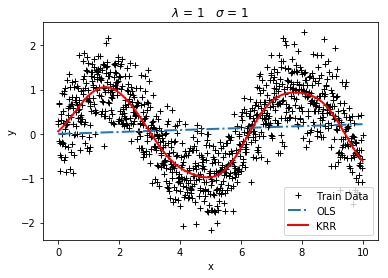

In [21]:
test_sine_toydata()

**B) (5 points)** We want to analyse how the Kernel Ridge solution depends on its hyperparameters, the kernel width $\sigma$ and  the regularization parameter $\lambda$. 
- Call the function  ```test_sine_toydata```  with $\lambda$ = 1 for three different Kernel widths, $\sigma = \{ 0.1, 1, 10\}$. How does the Kernel width affect the solution? Explain the observed behaviour.  
- Call the function  ```test_sine_toydata```  with $\sigma$ = 1 for three different regularization parameters, $\lambda = \{ 10^{-10}, 1, 500\}$. How does the regularization parameter affect the solution? Explain the observed behaviour.  

**Answers for B)**

The Kernel width $\sigma$ is the parameters in Gaussian Kernel. If $\sigma$ is very small, it tends to overfitting which every data set can be modeled perfectly. And if $\sigma$ is very large, it may leads to underfitting and when $\sigma=1$,it seems to be a more reasonable to choose.

The regularization parameters $\lambda$ is used to control the complexity of solution, If $\lambda$ is very small like 1e-10, it tends to a unbiased but overfitting result. If $\lambda$ is very large like 500, it tends to a strong biased with low variance but underfitting result. And when $\lambda =1$,it leads to a good fitting.

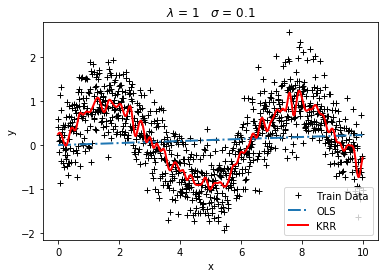

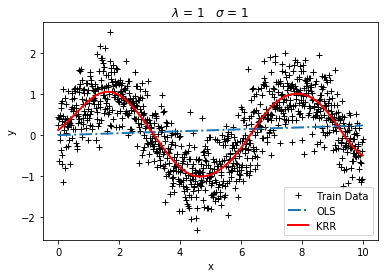

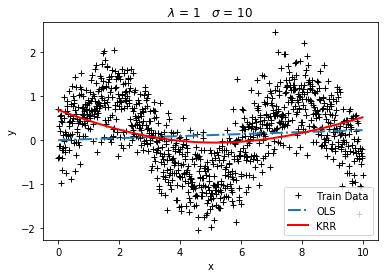

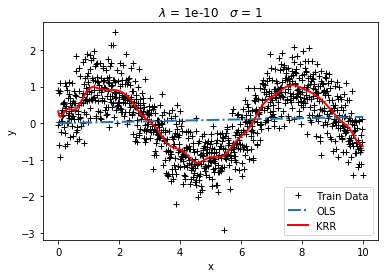

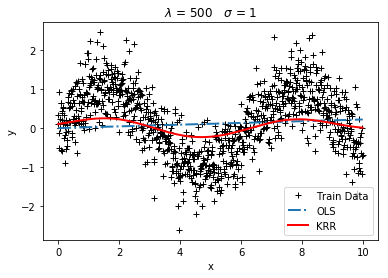

In [22]:
test_sine_toydata(kwidth = 0.1, llambda = 1)
test_sine_toydata(kwidth = 1, llambda = 1)
test_sine_toydata(kwidth = 10, llambda = 1)
test_sine_toydata(kwidth = 1, llambda = 1e-10)
test_sine_toydata(kwidth = 1, llambda = 500)

**C) (4 points)**  Briefly explain in your own words how nested-crossvalidation is done. To do so, you can examine the function ```crossvalidate_krr```.Explain briefly how $\lambda$ and $\sigma$ are chosen within the function. 

**[Your answers for C) here]**

**D) (6 points)** Predict two dimensional hand positions with Kernel Ridge Regression by calling the function ``` test_handpositions```. It shows a boxplot for the linear regression and the Kernel Ridge Regression.  What does a boxplot show? (check the help function in python or the wikipedia article). Do we gain something from Kernel Ridge Regression as compared to simple linear regression? 

**Answers for D) **

A boxplot is a method for graphically depicting groups of numerical data through their quartiles. It show the maximum value,75th percentile, median, 25th percentile,minimum value. Also, it can be added with mean value.
In this case, it can be easily found Kernel Ridge Regression have a better performance than simple linear regression.

Fold 0 best kernel width 10.000000 best regularizer 0.010000 rsquare 0.958187 rsquare linear 0.919589
Fold 1 best kernel width 10.000000 best regularizer 0.010000 rsquare 0.965003 rsquare linear 0.922286
Fold 2 best kernel width 10.000000 best regularizer 0.010000 rsquare 0.958290 rsquare linear 0.917205
Fold 3 best kernel width 10.000000 best regularizer 0.010000 rsquare 0.956295 rsquare linear 0.905826
Fold 4 best kernel width 10.000000 best regularizer 0.010000 rsquare 0.959677 rsquare linear 0.918318


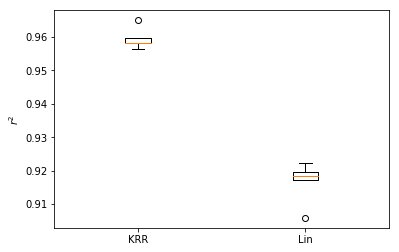

In [26]:
test_handpositions()

**E) (1 point)** In the last task, we have applied the function ```test_handpositions``` only to the first $1000$ data points out of the $10255$ available data points. Why did we do so in this exercice?

**Answers for E)**

With less data points than the dimensions, Kernel methods can offer a speed up. The complexity would increase with the number of data points, so if we apply all avaiable data points,to compute 10255x10255 kernel matrix will be very slow.